In [41]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")
df = df.iloc[1:].reset_index(drop=True)

In [42]:
print("Total countries:", df["Q24_1"].nunique())
df["Q24_1"].unique()

Total countries: 44


array(['Finance', 'Strategy', 'IT', 'Logistics', 'Procurement',
       'Merchandise Management', 'Global eCommerce', 'Other',
       'Human Resources', 'Construction & Facility Management',
       'Retail Store', 'Controlling', 'Retail Operations',
       'Sustainability', 'Legal', 'No answer',
       'Product Development & Operations', 'Business Unit BOSS Menswear',
       'Corporate Communications', 'Marketing & Brand Communications',
       'Business Unit HUGO', 'Business Units Ticino', 'Global Retail',
       'eCommerce', 'Business Unit BOSS Womenswear', 'Internal Audit',
       'Technical Center', 'Retail Management', 'Licences',
       'Sourcing & Production', 'Store Design & Visual Merchandising',
       'Materials Management', 'Global Travel Retail', 'Retail Services',
       'Digital Excellence', 'Production Izmir - Jersey',
       'Production Izmir - Womenswear',
       'Production Izmir- Menswear (Suit)', 'Production Izmir - Shirt',
       'Real Estate Management', "Log. Dis

In [43]:
df["Q24_1"].value_counts()

Q24_1
Business Unit BOSS Menswear               411
Retail Store                              239
Other                                     229
Production Izmir- Menswear (Suit)         187
Human Resources                           148
Product Development & Operations          129
IT                                        122
Logistics                                 114
Business Units Ticino                      99
No answer                                  97
Business Unit BOSS Womenswear              83
Production Izmir - Jersey                  82
Production Izmir - Womenswear              67
Business Unit HUGO                         67
Retail Management                          64
Production Izmir - Shirt                   60
Finance                                    59
Procurement                                56
Merchandise Management                     54
Technical Center                           40
Marketing & Brand Communications           38
Store Design & Visual Mercha

In [44]:
# Columns that talk about how well a certain quality is reflected in the division
qualities_columns = ["Q8", "Q10", "Q12", "Q14", "Q16", "Q18"]
division_column = "Q24_1"
extra_columns = ["Q37", "Q25", "Q26", "Q27", "Q23_1"]
df = df[qualities_columns + [division_column] + extra_columns]

null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

# Define a mapping from categorical responses to numerical values
response_mapping = {
    "Very poor": 1,
    "Poor": 2,
    "Satisfactory": 3,
    "Well": 4,
    "Very well": 5,
    "No answer": None,
}

Shape:  (3504, 12)
Null values in each column:
 Q8       436
Q10      439
Q12      446
Q14      453
Q16      452
Q18      461
Q24_1    723
Q37      807
Q25      753
Q26      741
Q27      750
Q23_1    723
dtype: int64


In [45]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

In [46]:
df.columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
    "Division",
    "Occupational Group",
    "Leadership Position",
    "Tenure",
    "Age",
    "Country"
]
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,Satisfactory,Satisfactory,Well,Satisfactory,Well,Poor,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
1,Very well,Well,Very well,Well,Satisfactory,Well,Strategy,White Collar,No,> 10 years,35 - 42,Germany
2,No answer,Very poor,Very poor,Very poor,Very poor,Very poor,IT,White Collar,No,5-10 years,27 - 34,Germany
3,Poor,Well,Poor,Satisfactory,Very poor,Poor,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,Very well,Very well,Very well,Well,Very well,Well,Procurement,No answer,No,1-3 years,27 - 34,Switzerland


In [47]:
country_counts = df["Division"].value_counts()
countries_to_keep = country_counts[country_counts > 100].index
df = df[df["Division"].isin(countries_to_keep)]
df.shape

(1501, 12)

In [48]:
# Convert categorical responses to numerical values for quality columns
qualities_columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
]

for quality in qualities_columns:
    df[quality] = df[quality].map(response_mapping)
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
2,NaN,1.0,1.0,1.0,1.0,1.0,IT,White Collar,No,5-10 years,27 - 34,Germany
3,2.0,4.0,2.0,3.0,1.0,2.0,Logistics,White Collar,No,3-5 years,27 - 34,Germany
5,4.0,2.0,3.0,3.0,4.0,4.0,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany
9,4.0,2.0,3.0,3.0,3.0,2.0,IT,White Collar,No,5-10 years,35 - 42,Germany
10,4.0,3.0,3.0,3.0,5.0,5.0,Human Resources,White Collar,No,> 10 years,43 - 50,Germany


In [49]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

Shape:  (1450, 12)
Null values in each column:
 TRUST                     0
ENTREPRENEURIAL SPIRIT    0
YOUTHFUL SPIRIT           0
SIMPLICITY & QUALITY      0
TEAM MENTALITY            0
PERSONAL OWNERSHIP        0
Division                  0
Occupational Group        0
Leadership Position       0
Tenure                    0
Age                       0
Country                   0
dtype: int64


In [50]:
country_data

,Division,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP
0,Business Unit BOSS Menswear,3.751366,3.726776,3.792350,3.857923,3.836066,3.800546
1,Business Unit BOSS Womenswear,3.756757,3.729730,3.837838,3.891892,3.594595,3.729730
2,Business Unit HUGO,4.049180,3.819672,4.098361,3.967213,4.131148,4.065574
3,Business Units Ticino,3.768421,3.694737,3.684211,3.663158,3.852632,3.810526
4,Finance,3.928571,3.446429,3.464286,3.642857,3.696429,3.678571
5,Human Resources,4.063830,3.624113,3.737589,3.673759,4.134752,3.957447
6,IT,3.646552,3.189655,3.379310,3.224138,3.810345,3.517241
7,Logistics,3.495327,3.130841,3.140187,3.401869,3.411215,3.439252
8,Merchandise Management,3.901961,3.529412,3.666667,3.431373,3.901961,3.725490
9,No answer,3.294118,3.294118,3.447059,3.305882,3.529412,3.635294


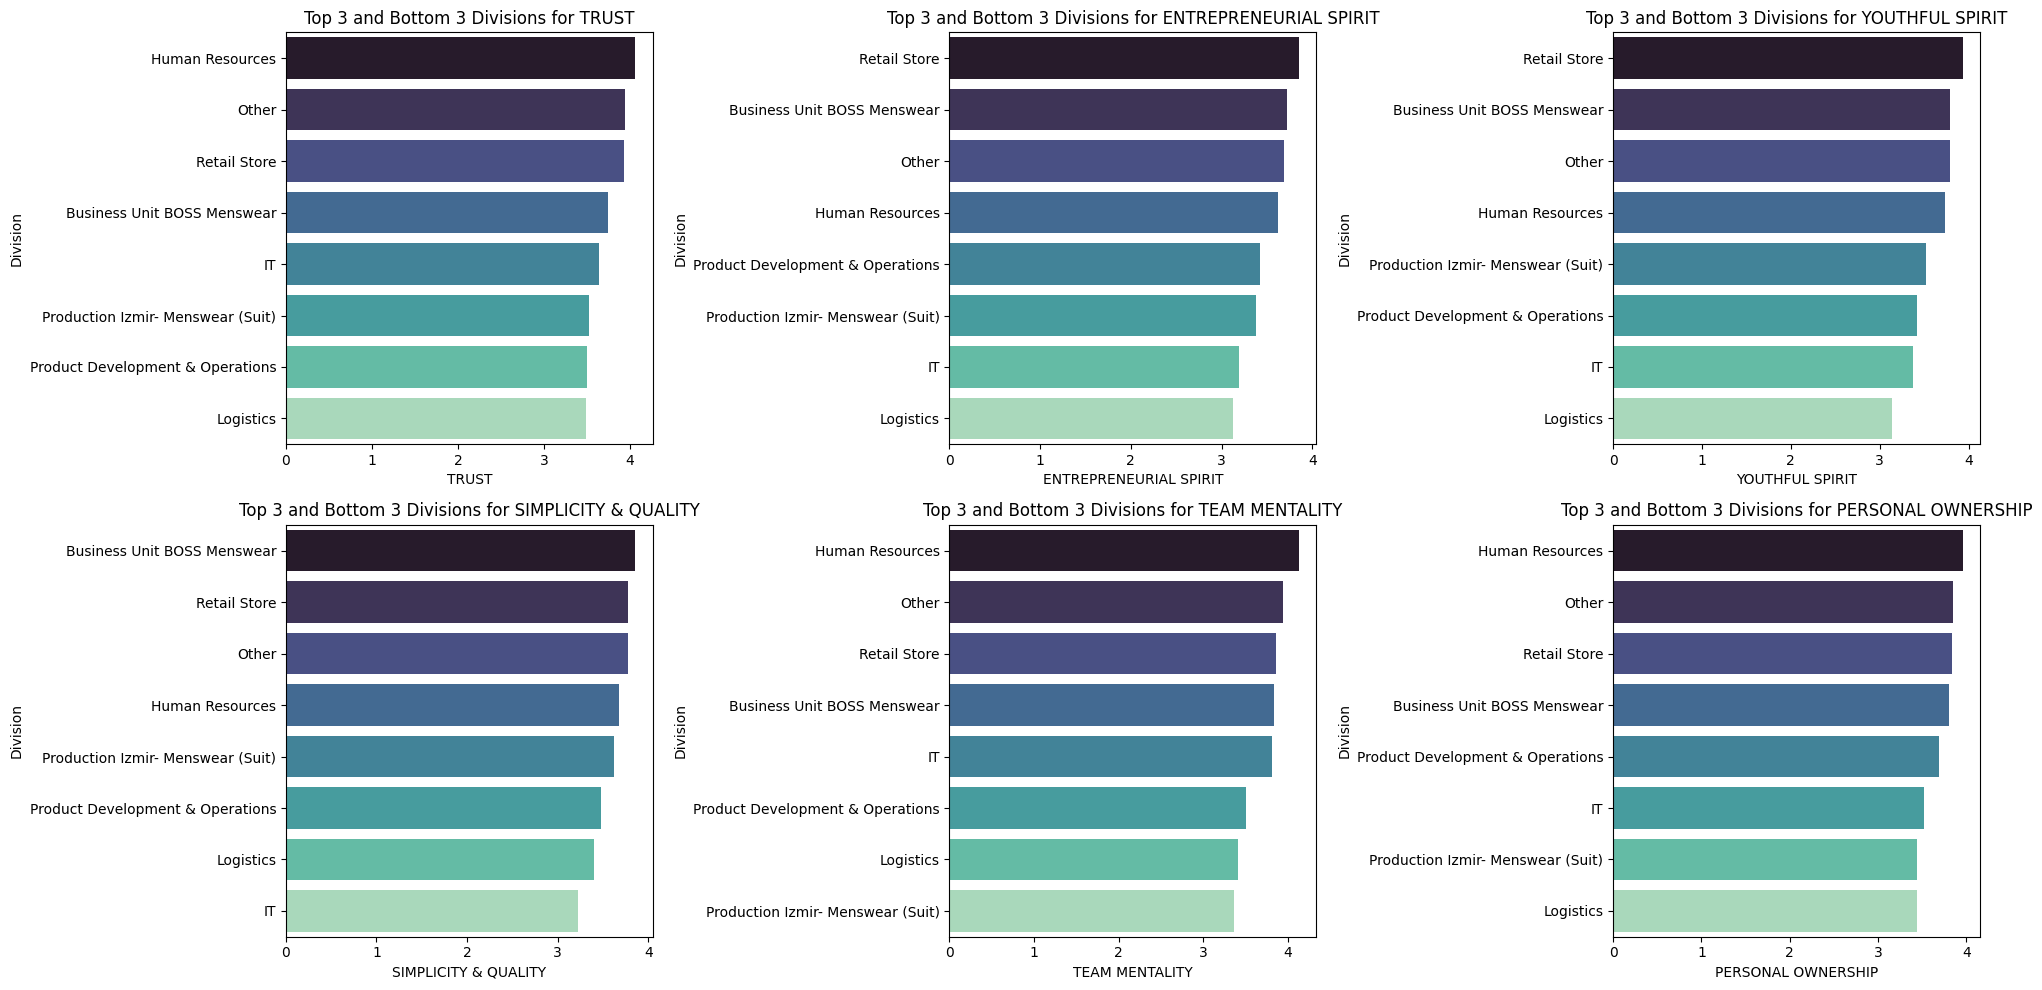

In [51]:
country_data = df[qualities_columns + ['Division']]
country_data = country_data.groupby('Division').mean().reset_index()

# Function to get top 5 and bottom 6 for each quality (column)
def get_top_bottom(df, column):
    sorted_df = df[["Division", column]].sort_values(by=column, ascending=False)
    top_5 = sorted_df.head()
    bottom_6 = sorted_df.tail()
    combined_df = pd.concat([top_5, bottom_6])
    return combined_df


# Create subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each column and assign each plot to a subplot
for i, col in enumerate(
    qualities_columns
):  # Loop over qualities columns list
    # Get top 5 and bottom 6 for the current column
    top_bottom_df = get_top_bottom(country_data, col)

    # Plot in the corresponding subplot
    sns.barplot(
        x=col, y="Division", data=top_bottom_df, palette="mako", ax=ax[i // 3, i % 3]
    )
    ax[i // 3, i % 3].set_title(f"Top 3 and Bottom 3 Divisions for {col}")
    ax[i // 3, i % 3].set_xlabel(col)
    ax[i // 3, i % 3].set_ylabel("Division")

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [52]:
grouped_data = df.groupby(["Division", "Age"])[qualities_columns].mean()
print(grouped_data)

                                                TRUST  ENTREPRENEURIAL SPIRIT  \
Division                          Age                                           
Business Unit BOSS Menswear       27 - 34    3.726496                3.760684   
                                  35 - 42    3.720430                3.677419   
                                  43 - 50    3.750000                3.796875   
                                  51 - 58    3.947368                3.684211   
                                  No answer  3.571429                3.666667   
                                  ≤ 26       3.847826                3.673913   
                                  ≥ 59       4.000000                3.833333   
Human Resources                   27 - 34    3.933333                3.466667   
                                  35 - 42    4.148148                3.592593   
                                  43 - 50    4.095238                3.714286   
                            

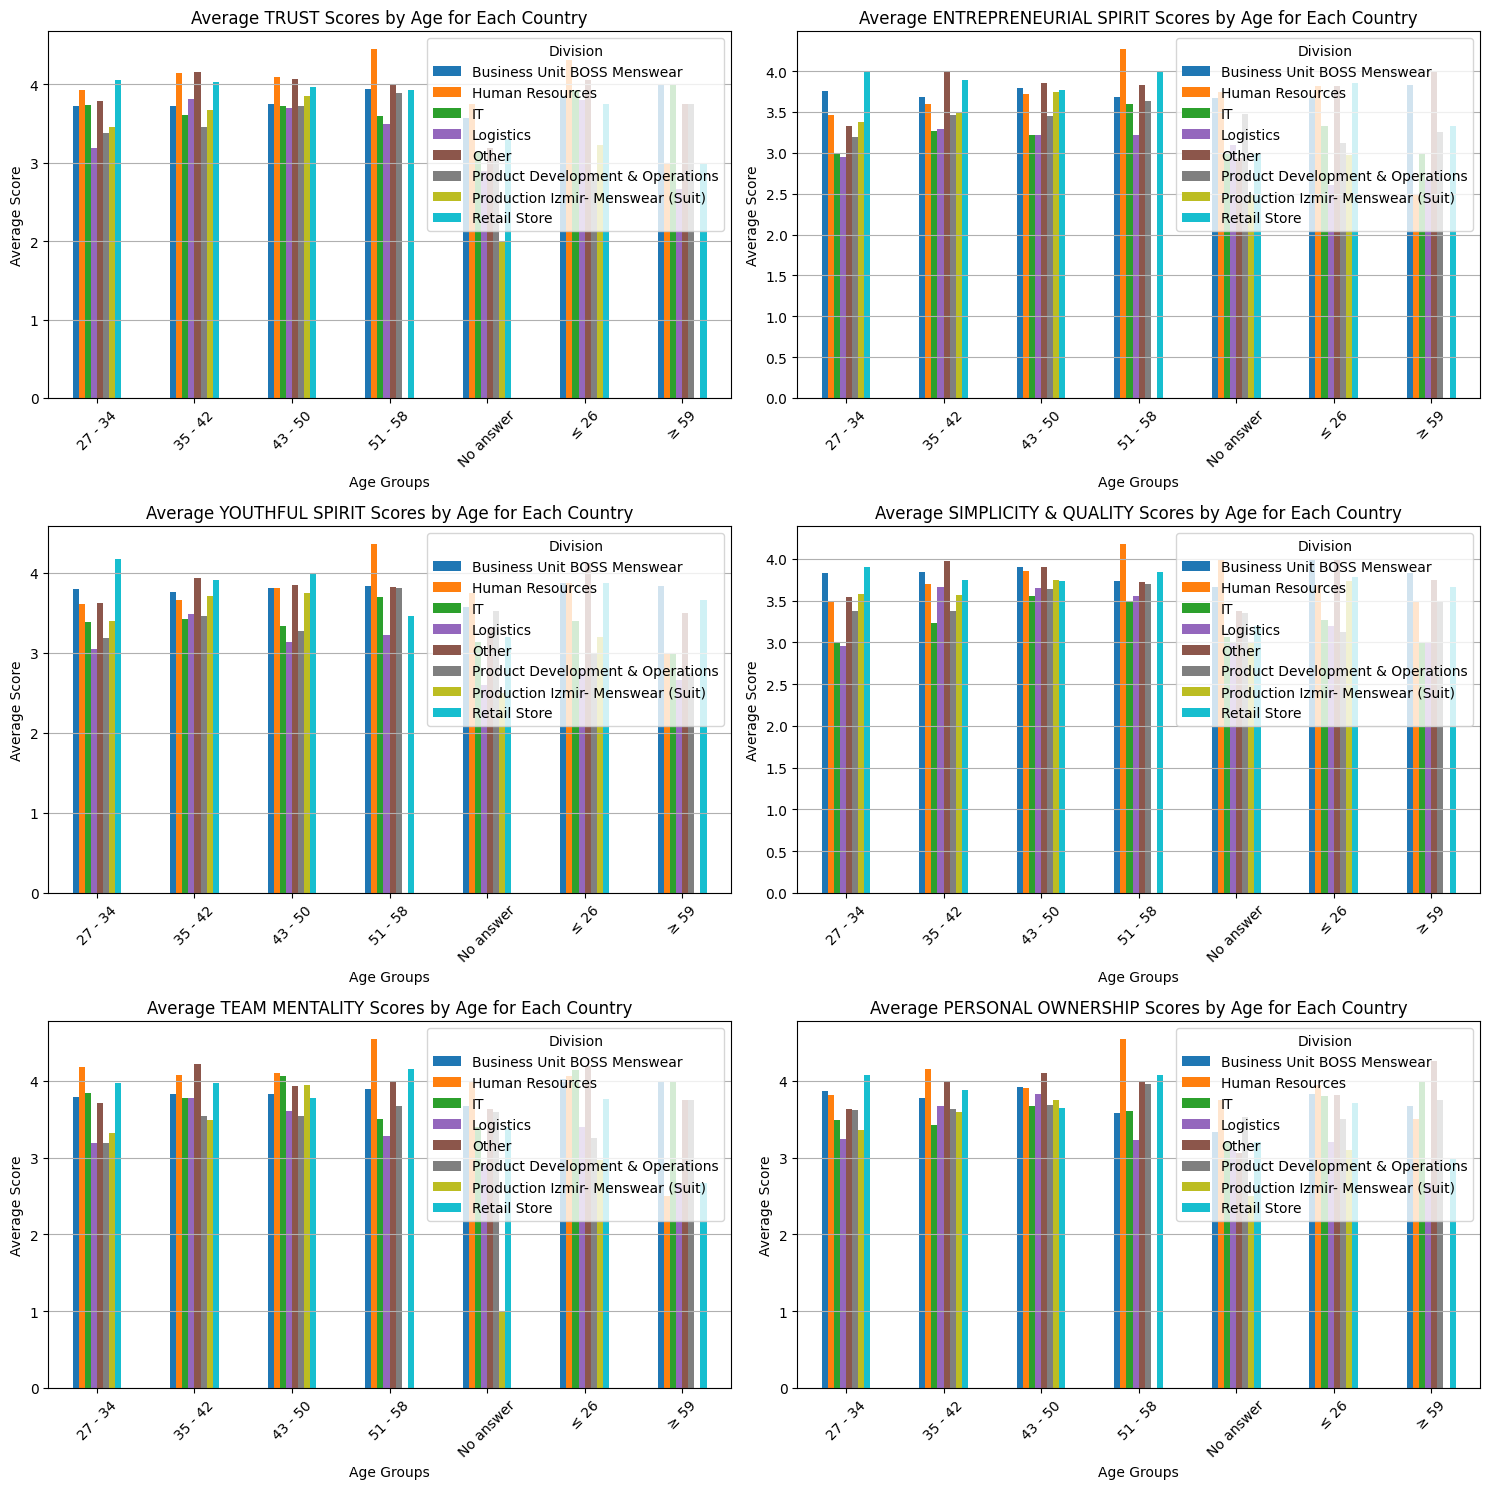

In [53]:
import numpy as np

n_qualities = len(qualities_columns)
countries = grouped_data.index.levels[0]  # List of unique countries
n_rows = (n_qualities + 1) // 2  # Two plots per row

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Step 4: Create a color map for countries
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

# Step 5: Loop through each quality and plot for each country
for i, quality in enumerate(qualities_columns):
    # Step 6: Unstack the data for the current quality
    quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

    # Step 7: Plot each country's data with specific colors
    quality_data.plot(kind='bar', ax=axes[i], color=colors)
    
    axes[i].set_title(f'Average {quality} Scores by Age for Each Country')
    axes[i].set_xlabel('Age Groups')
    axes[i].set_ylabel('Average Score')
    axes[i].set_xticklabels(quality_data.index, rotation=45)
    axes[i].grid(axis='y')

# Hide any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


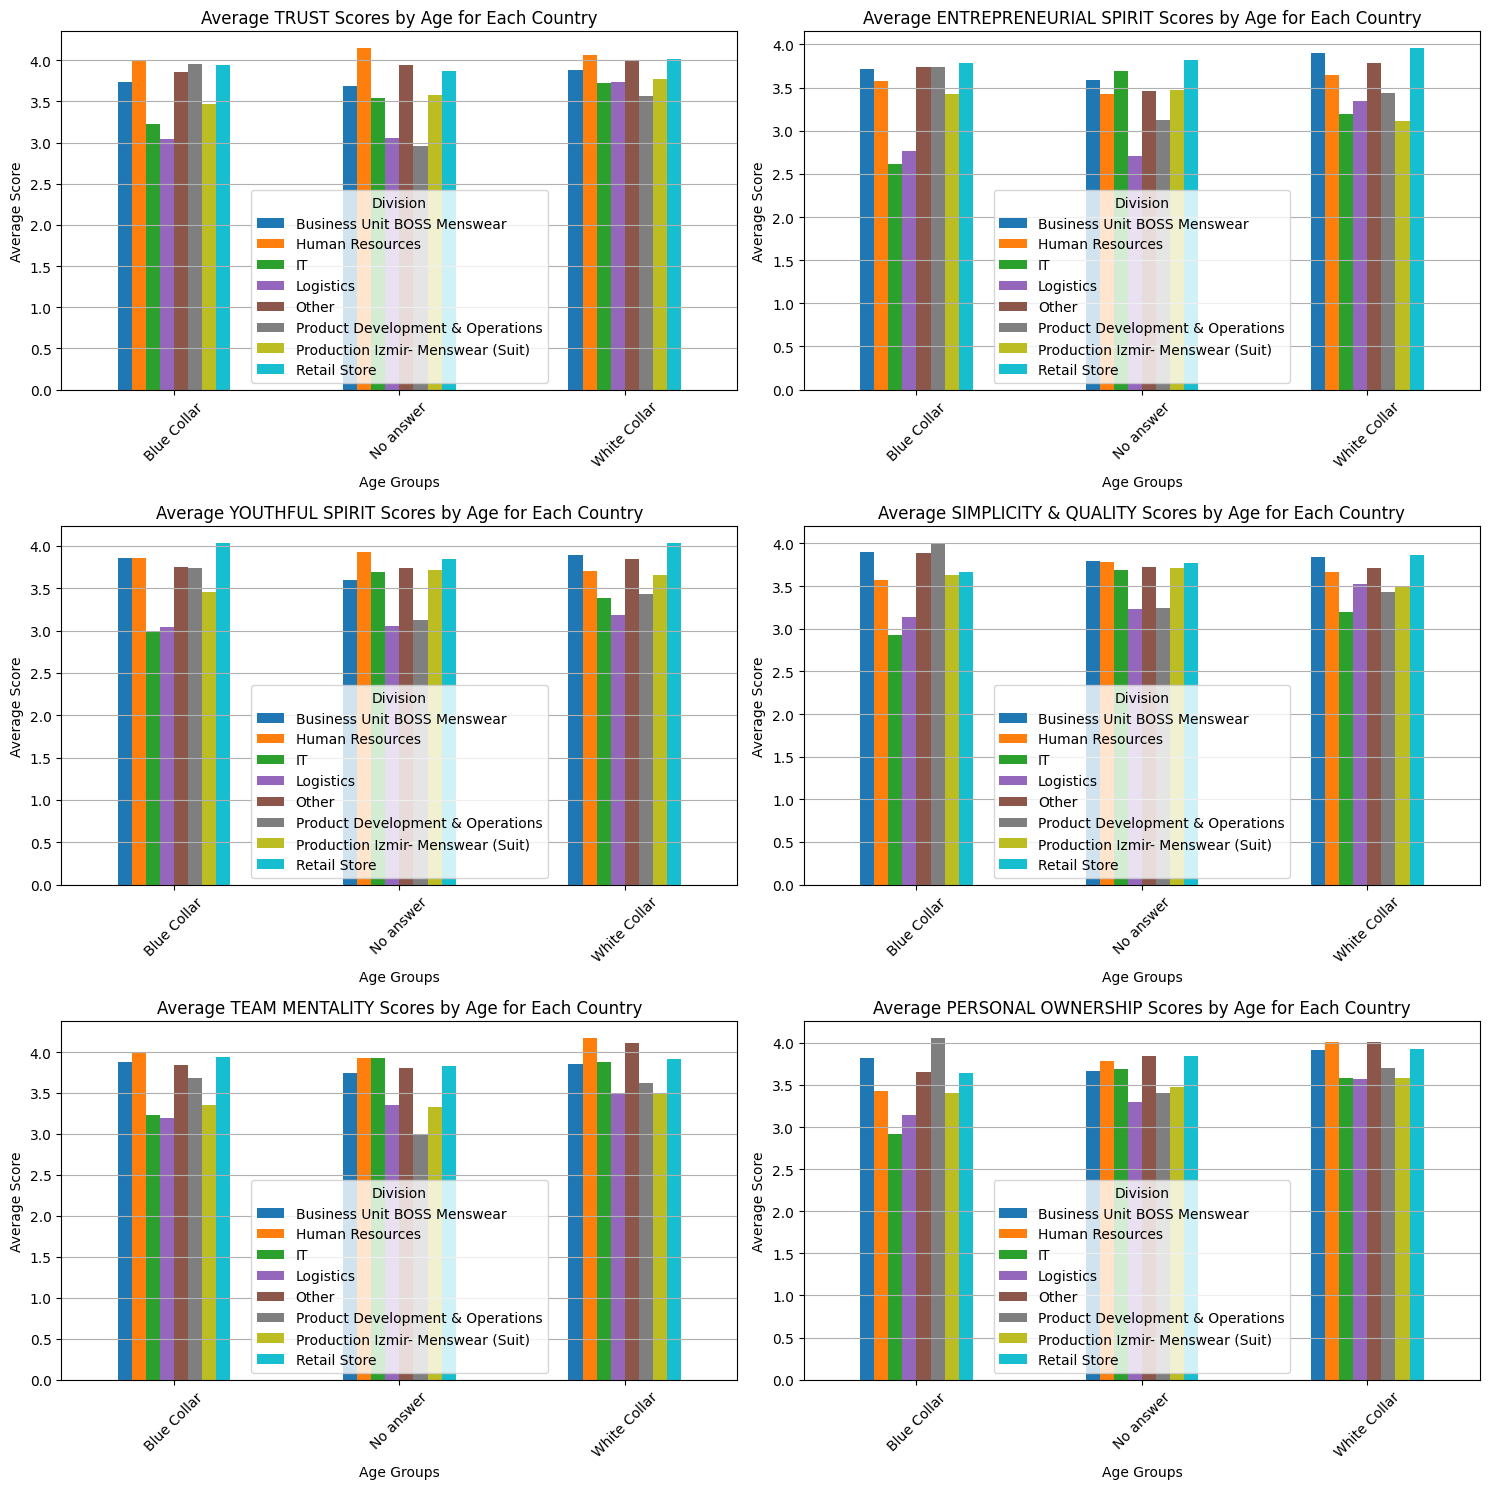

In [55]:
grouped_data = df.groupby(["Division", "Occupational Group"])[qualities_columns].mean()

# Step 2: Drop any 'No answer' if necessary (if you have that in your data)
# grouped_data = grouped_data.drop('No answer', errors='ignore')

# Step 3: Create a figure to hold multiple subplots
n_qualities = len(qualities_columns)
countries = grouped_data.index.levels[0]  # List of unique countries
n_rows = (n_qualities + 1) // 2  # Two plots per row

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Step 4: Create a color map for countries
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))  # Using tab10 colormap for different countries

# Step 5: Loop through each quality and plot for each country
for i, quality in enumerate(qualities_columns):
    # Step 6: Unstack the data for the current quality
    quality_data = grouped_data[quality].unstack(level=0)  # Unstack to separate countries

    # Step 7: Plot each country's data with specific colors
    quality_data.plot(kind='bar', ax=axes[i], color=colors)
    
    axes[i].set_title(f'Average {quality} Scores by Age for Each Country')
    axes[i].set_xlabel('Age Groups')
    axes[i].set_ylabel('Average Score')
    axes[i].set_xticklabels(quality_data.index, rotation=45)
    axes[i].grid(axis='y')

# Hide any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
